Problem Statement:
To make a suitable machine learning algorithm to predict if the mushroom is
edible or poisonous (e or p) using the given dataset.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading dataset

In [3]:
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
data.shape

(8124, 23)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
data.duplicated().sum()

0

In [7]:
#checking null values

In [8]:
data.isna().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [9]:
data.columns

Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat'],
      dtype='object')

In [10]:
#EDA

In [11]:
for i in data.columns:
    print('\n','\n',i,'\n')
    print(data[i].value_counts())


 
 class 

e    4208
p    3916
Name: class, dtype: int64

 
 cap-shape 

x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64

 
 cap-surface 

y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64

 
 cap-color 

n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
u      16
r      16
Name: cap-color, dtype: int64

 
 bruises 

f    4748
t    3376
Name: bruises, dtype: int64

 
 odor 

n    3528
f    2160
y     576
s     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64

 
 gill-attachment 

f    7914
a     210
Name: gill-attachment, dtype: int64

 
 gill-spacing 

c    6812
w    1312
Name: gill-spacing, dtype: int64

 
 gill-size 

b    5612
n    2512
Name: gill-size, dtype: int64

 
 gill-color 

b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64

 
 stalk-shape 

t    4608


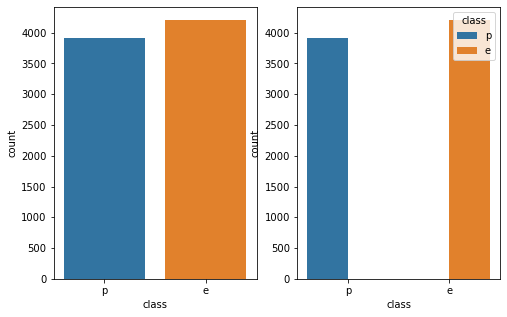

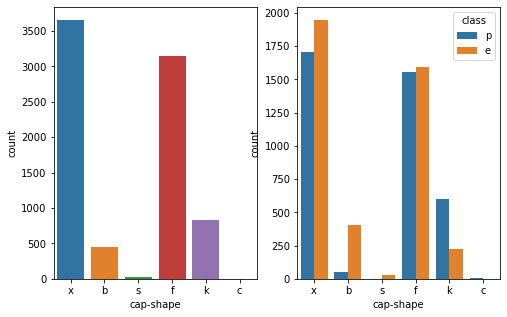

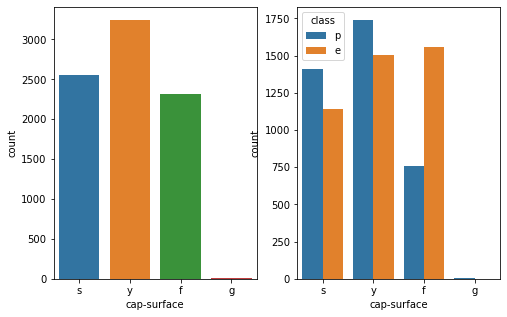

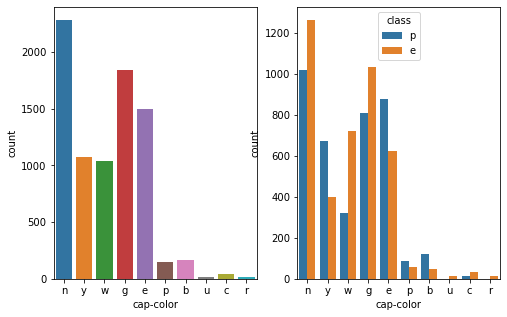

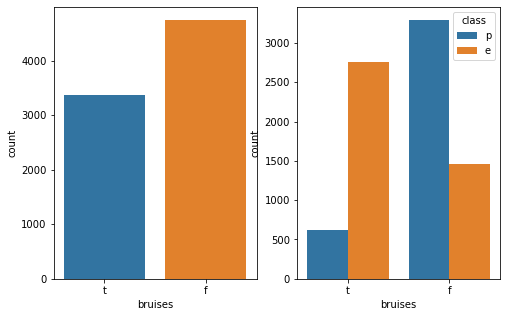

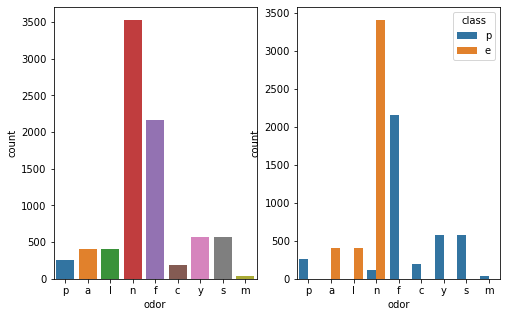

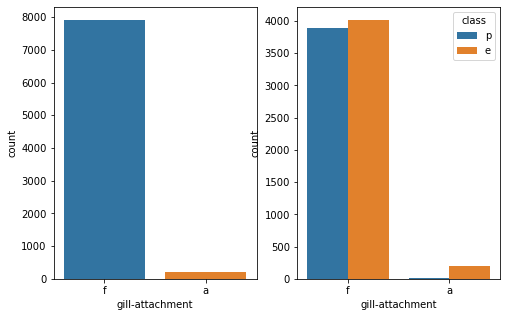

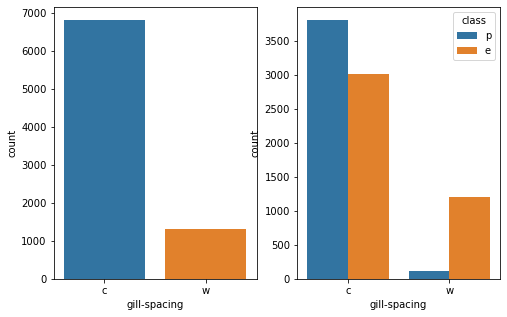

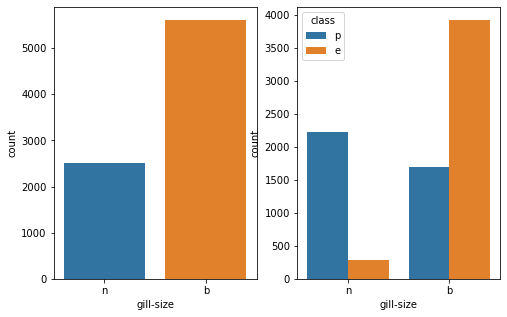

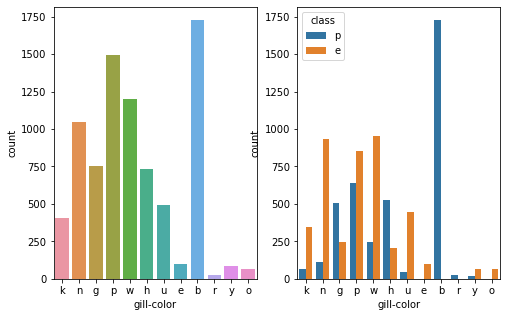

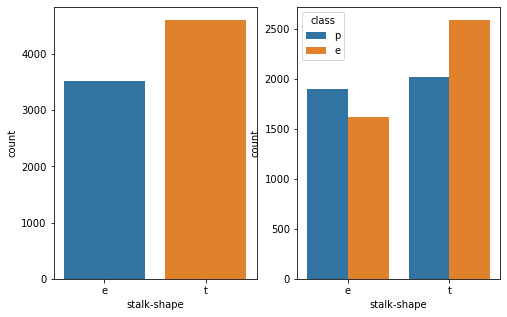

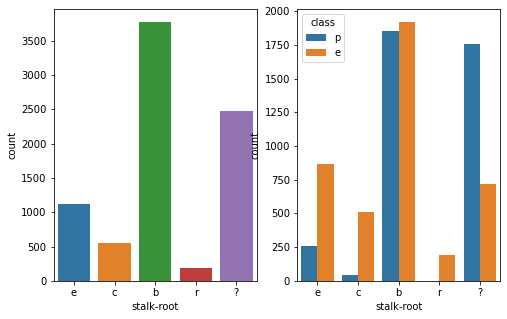

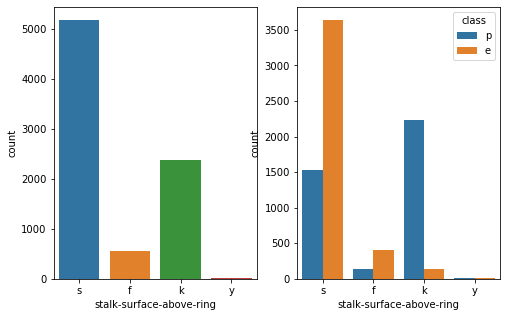

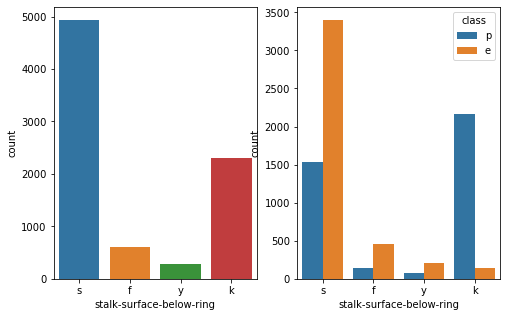

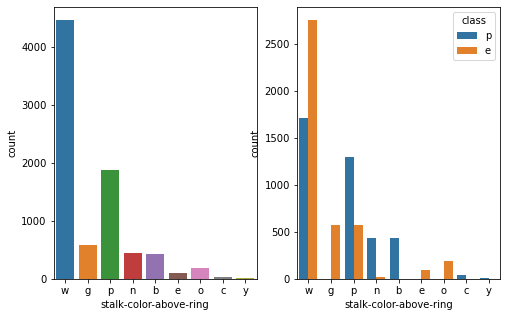

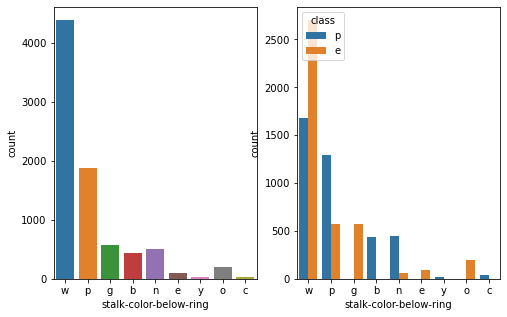

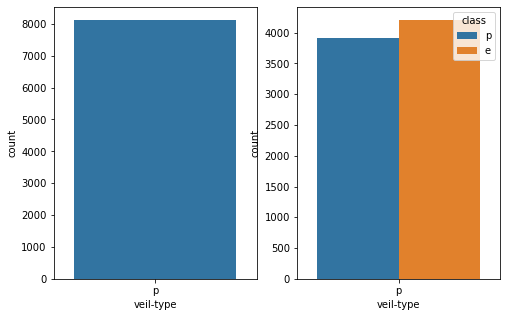

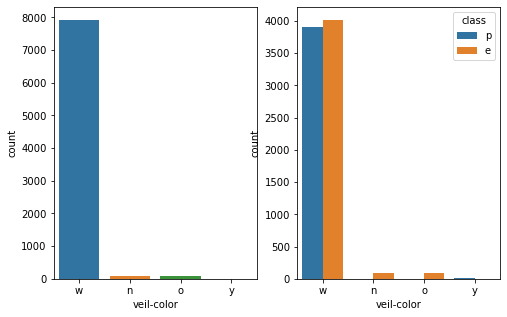

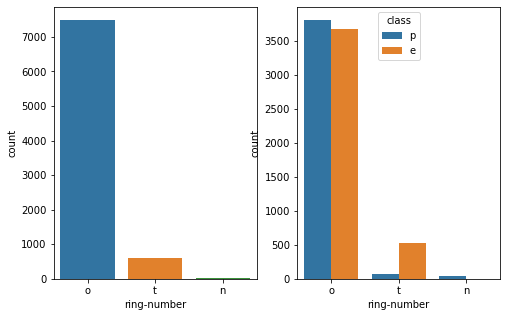

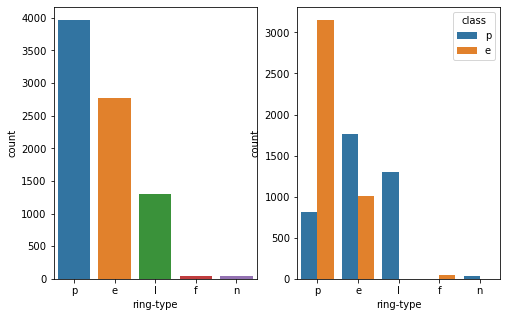

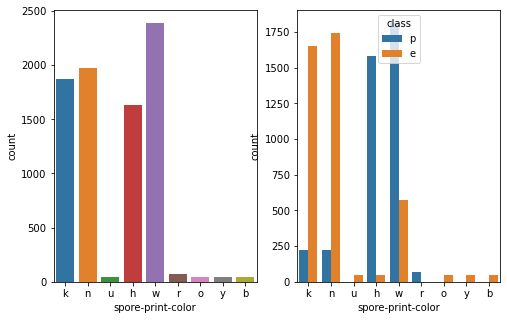

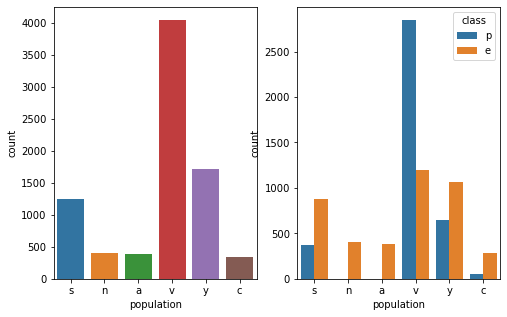

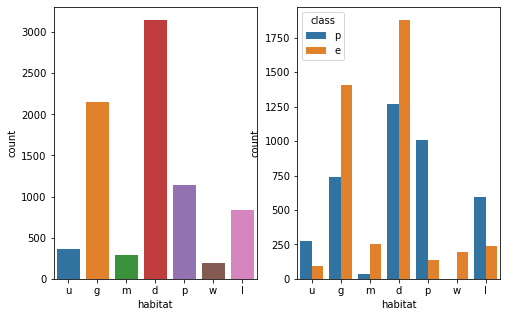

In [12]:
for i in data.columns:
    plt.figure (figsize=(8,5))
    plt.subplot(1,2,1)
    sns.countplot(x=data[i],data=data)
        
    plt.subplot(1,2,2)
    sns.countplot(x=data[i],hue='class',data=data)
    plt.show()

# Preprocessing
only one value for feature veil-type so it never effect the prediction that's we cauld drop it from dataset 

In [13]:
data=data.drop(['veil-type'],axis=1)

In [14]:
print(data['stalk-root'].value_counts()/len(data))



b    0.464796
?    0.305268
e    0.137863
c    0.068439
r    0.023634
Name: stalk-root, dtype: float64


In [15]:
# NOTE: stalk-root has more than 30% missing values. Droping the col would make more sense.
data.drop('stalk-root',axis=1,inplace=True)

In [16]:
#label encoding

In [17]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
label_encoder={}

for i in data.columns:
    label_encoder[i] = LabelEncoder()
    data[i] = label_encoder[i].fit_transform(data[i]) 

In [18]:
data.head(10)

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,2,7,7,2,1,0,3,0,1
5,0,5,3,9,1,0,1,0,0,5,...,2,2,7,7,2,1,4,2,2,1
6,0,0,2,8,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,2,3
7,0,0,3,8,1,3,1,0,0,5,...,2,2,7,7,2,1,4,3,3,3
8,1,5,3,8,1,6,1,0,1,7,...,2,2,7,7,2,1,4,2,4,1
9,0,0,2,9,1,0,1,0,0,2,...,2,2,7,7,2,1,4,2,3,3


<AxesSubplot:>

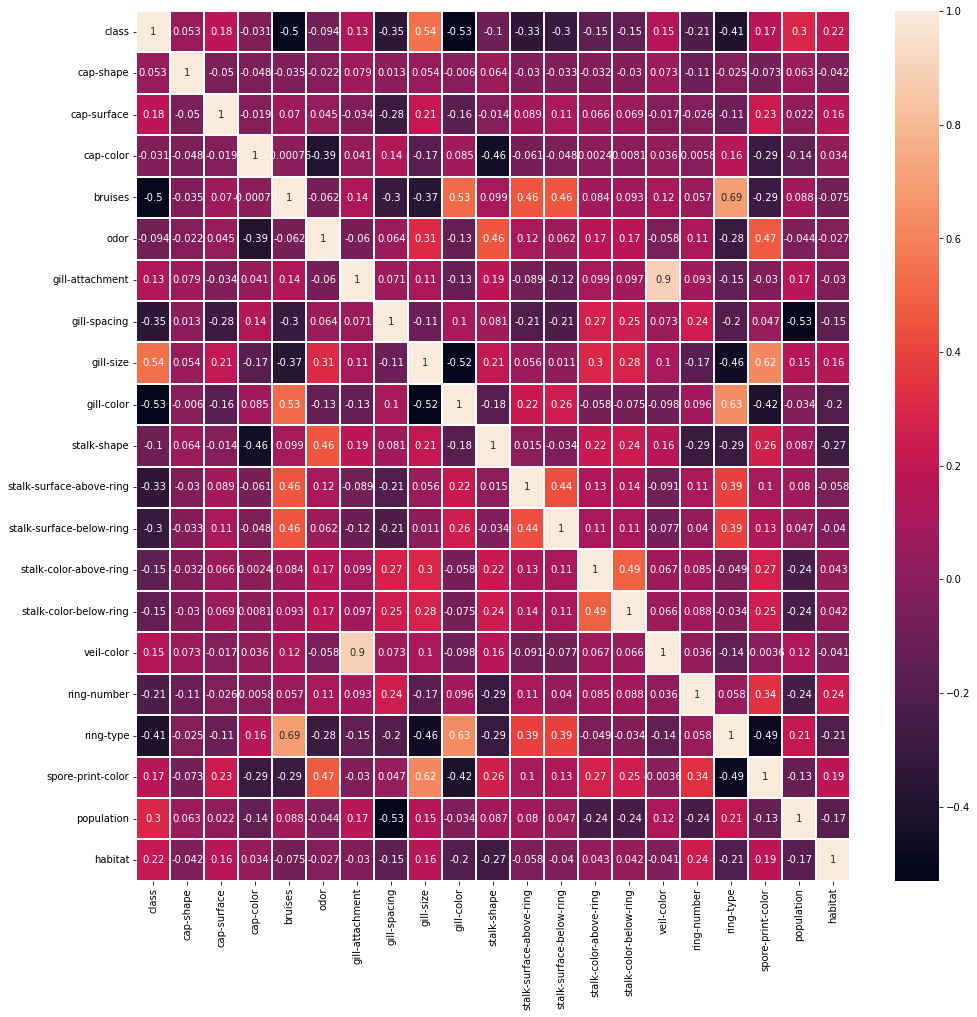

In [19]:
plt.figure(figsize=(16,16))
sns.heatmap(data.corr(),linewidths=0.1,annot=True)

In [20]:
x=data.drop(['class'],axis=1)
y=data['class']

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [22]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB

In [23]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import  f1_score
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix,ConfusionMatrixDisplay

In [24]:
def classification_task( model,x_train, y_train ,x_test,y_test, predic,model_name):
 
    table=pd.DataFrame({'Train_Score':model.score(x_train,y_train),"Test_Score":model.score(x_test,y_test),
                       "Precision_Score":precision_score(y_test,predic),"Recall_Score":recall_score(y_test,predic),
                       "F1_Score":f1_score(y_test,predic) , "accuracy":accuracy_score(y_test,predic)}, index=[model_name])
    return table

KNN

In [25]:
# Training KNN model on the data 
KNN = KNeighborsClassifier()
# Fit the model
KNN.fit(x_train,y_train)
#predict x_test
pred2 = KNN.predict(x_test)

In [26]:
Eval_KNN= classification_task(KNN,x_train, y_train ,x_test ,y_test,pred2,"KNN" )
Eval_KNN

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
KNN,0.999344,0.996553,0.993976,0.998991,0.996477,0.996553


Decision Tree

In [27]:
Decision_Tree = DecisionTreeClassifier() 
# Fit the model
Decision_Tree.fit(x_train,y_train)
#predict x_test
pred3 = Decision_Tree.predict(x_test)

In [28]:
Eval_dec = classification_task(Decision_Tree,x_train, y_train ,x_test ,y_test,pred3,"Decision Tree" )
Eval_dec

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Decision Tree,1.0,1.0,1.0,1.0,1.0,1.0


Random Forest

In [29]:
Random_Forest= RandomForestClassifier()
# Fit the model
Random_Forest.fit(x_train,y_train)
#predict x_test
pred4 = Random_Forest.predict(x_test)

In [30]:
Eval_fores= classification_task(Random_Forest,x_train, y_train ,x_test ,y_test,pred4,"Random Forest" )
Eval_fores

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
Random Forest,1.0,1.0,1.0,1.0,1.0,1.0


XGBoost

In [31]:
xgb = XGBClassifier()
# Fit the model
xgb.fit(x_train,y_train)
#predict x_test
pred5 = xgb.predict(x_test)

In [32]:
Eval_XGB= classification_task(xgb,x_train, y_train ,x_test ,y_test,pred5,"XGB" )
Eval_XGB

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
XGB,1.0,1.0,1.0,1.0,1.0,1.0


Logistic regression

In [33]:
lr = LogisticRegression()
# Fit the model
lr.fit(x_train, y_train)
#predict x_test
pred7 = lr.predict(x_test)


C:\Users\XArchitecture\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [34]:
Eval_lr= classification_task(lr,x_train, y_train ,x_test ,y_test,pred7,"logisitc regression" )
Eval_lr

,Train_Score,Test_Score,Precision_Score,Recall_Score,F1_Score,accuracy
logisitc regression,0.948137,0.948301,0.94929,0.944501,0.946889,0.948301


In [ ]:
#Fittting kernel svm to the training set
svm_linear=SVC(kernel='linear')
svm_linear.fit(x_train,y_train)
pred8=svm_linear.predict(x_test)

In [ ]:
Eval_svm= classification_task(svm_linear,x_train, y_train ,x_test ,y_test,pred8,"SVM" )
Eval_svm

 Naïve Bayes’ Classifier 

In [ ]:
# Train naive bayes Gaussian model on the  data
clf = GaussianNB()
# Fit the model
clf.fit(x_train,y_train)
#predict x_test
pred6 = clf.predict(x_test)

In [ ]:
Eval_clf= classification_task(clf,x_train, y_train ,x_test ,y_test,pred6,"Naive Bayes_Gaussian" )
Eval_clf

In [ ]:
# Train naive bayes Bernoulli model on the  data
clf1 = BernoulliNB()
# Fit the model
clf1.fit(x_train,y_train)
#predict x_test
pred9 = clf1.predict(x_test)

In [ ]:
Eval_clf1= classification_task(clf1,x_train, y_train ,x_test ,y_test,pred9,"Naive Bayes_Bernoulli" )
Eval_clf1

In [ ]:
table=pd.concat([Eval_KNN,Eval_dec,Eval_fores,Eval_XGB,Eval_lr,Eval_clf,Eval_clf1,Eval_svm])
table

Decision Tree,Random forest,XGB shows high accuracy,These are the best model to predict mushrooms data